<a href="https://colab.research.google.com/github/21p31a04g5/Machine_Learning/blob/main/Iris_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [8]:
data = load_iris()

In [9]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
data.target[50]

1

In [14]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df[df.target ==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [29]:
df['flower_name'] = df.target.apply(lambda x : data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [30]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [31]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

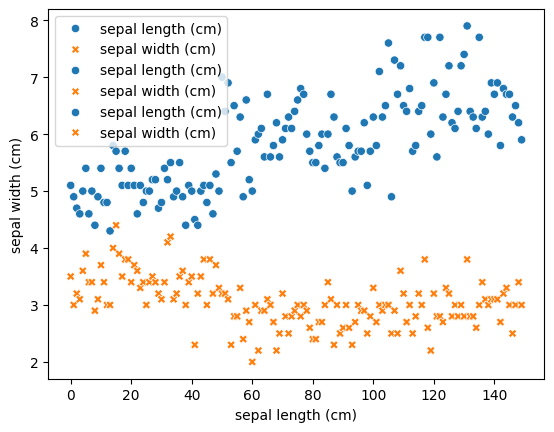

In [42]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
sns.scatterplot([df0['sepal length (cm)'],df0['sepal width (cm)']])
sns.scatterplot([df1['sepal length (cm)'],df1['sepal width (cm)']])
sns.scatterplot([df2['sepal length (cm)'],df2['sepal width (cm)']])

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

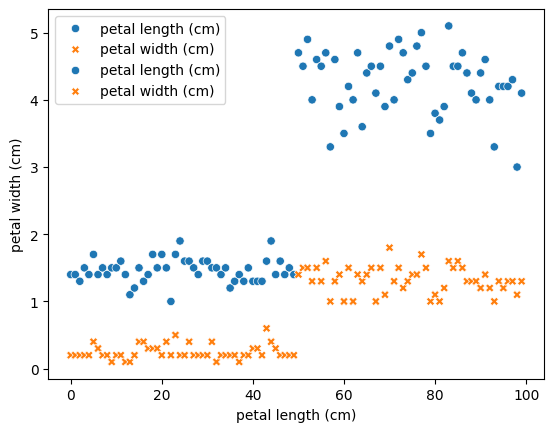

In [44]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
sns.scatterplot([df0['petal length (cm)'],df0['petal width (cm)']])
sns.scatterplot([df1['petal length (cm)'],df1['petal width (cm)']])

In [45]:
x=df.drop(['target', 'flower_name'],axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target','flower_name'],axis = 'columns'),df.target,test_size = 0.2)

In [48]:
from sklearn.svm import SVC
model = SVC()

In [49]:
model.fit(x_train,y_train)

SVC()

In [50]:
model.predict(x_test)

array([0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1,
       2, 0, 0, 2, 0, 2, 1, 1])

In [53]:
model.predict([[5,3,10,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [54]:
model.score(x_test,y_test)

0.9666666666666667